**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [107]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [108]:
# Ваш код здесь
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


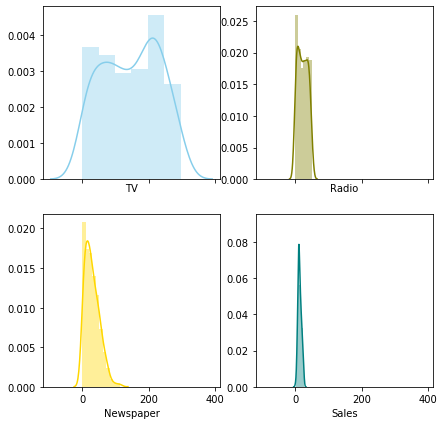

In [109]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( adver_data["TV"] , color="skyblue", ax=axes[0, 0])
sns.distplot( adver_data["Radio"] , color="olive", ax=axes[0, 1])
sns.distplot( adver_data["Newspaper"] , color="gold", ax=axes[1, 0])
sns.distplot( adver_data["Sales"] , color="teal", ax=axes[1, 1])

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [110]:
X = adver_data[['TV','Radio','Newspaper']].to_numpy()# Ваш код здесь
y =adver_data['Sales'].to_numpy() # Ваш код здесь
print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [111]:
import numpy as np
# Ваш код здесь
means, stds = np.mean(X, axis=0),np.std(X, axis=0)

In [112]:
for j in range(0,X.shape[1]):
    for i in range(0,X.shape[0]):  
        X[i][j]=(X[i][j]-means[j])/stds[j]

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [113]:
xones=np.ones((X.shape[0],1))
Xastr = np.hstack((xones, X))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [114]:
# Ваш код здесь
def mserror(y, y_pred):
   # return (sum((y-y_pred)**2))/len(y)
   # return ((y-y_pred)**2).sum()/len(y)
    return np.square(np.subtract(y,y_pred)).mean() 

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [115]:
answer1 = mserror(y,np.median(y))# Ваш код здесь
print(round(answer1, 3))

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [116]:
def normal_equation(X, y):
 #   return np.linalg.solve(X,y)
    return np.dot(np.linalg.pinv(np.array(X)), np.array(y))
  #  return np.dot(np.linalg.pinv(X),y)

In [117]:
print(np.array(Xastr))

[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007392e

In [118]:
norm_eq_weights = normal_equation(Xastr, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [119]:
answer2=norm_eq_weights[0]
print(round(answer2, 3))

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [120]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [121]:
y_pred=linear_prediction(Xastr,norm_eq_weights)
answer3 = mserror(y,y_pred)
print(round(answer3, 3))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$

In [122]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    L=X.shape[0]
    x=X[train_ind]
    y_pred= linear_prediction(x,w)
    rs=(y_pred-y[train_ind])
    grad0=2.0/L*x[0]*rs
    grad1=2.0/L*x[1]*rs
    grad2=2.0/L*x[2]*rs
    grad3=2.0/L*x[3]*rs
    return  w -eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [123]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
  #  weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    
    # Основной цикл
    #while weight_dist > min_weight_dist and iter_num < max_iter:
    while iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # Ваш код здесь
        new_w=stochastic_gradient_step(X, y, w, random_ind, eta=0.01)
        #print(w)
        error=mserror(y,linear_prediction(X,new_w))
        errors.append(error)
       # weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num+=1 
   # print(weight_dist)  
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [124]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(Xastr, y, w_init=np.ones(4), max_iter=1e5)
#print(stoch_grad_desc_weights, stoch_errors_by_iter)

Wall time: 2.26 s


In [125]:
print(stoch_errors_by_iter[-1])

2.786371424601605


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

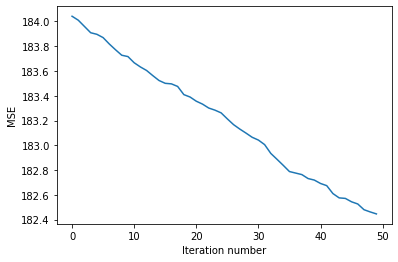

In [126]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

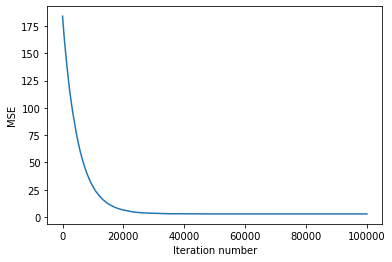

In [127]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [128]:
stoch_grad_desc_weights

array([14.01966176,  3.9491285 ,  2.76784622, -0.04540114])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [129]:
stoch_errors_by_iter[-1]

2.786371424601605

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [106]:
#y_pred=linear_prediction(Xastr,stoch_grad_desc_weights)
#print(shape(y_pred))
#print(shape(y))

(200,)


In [130]:
y_pred=linear_prediction(Xastr,stoch_grad_desc_weights)
answer4 = mserror(y,y_pred)
print(round(answer4, 3))

2.786


In [136]:
    with open('1.txt', 'w') as f_out:
        f_out.write(str(round(answer1, 3)))

In [137]:
with open('2.txt', 'w') as f_out:
        f_out.write(str(round(answer2, 3)))

In [138]:
with open('3.txt', 'w') as f_out:
        f_out.write(str(round(answer3, 3)))

In [139]:
with open('4.txt', 'w') as f_out:
        f_out.write(str(round(answer4, 3)))